In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.spatial.distance import cosine

In [2]:
df=pd.read_csv('nuovo_dataset_totale_preproc.csv', skipinitialspace=True, index_col=False)

In [3]:
df.select_dtypes(include=['int', 'float']).columns

Index(['Unnamed: 0', 'disc_number', 'duration_ms', 'popularity',
       'track_number', 'album_total_tracks', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'tempo_confidence',
       'time_signature_confidence', 'key_confidence', 'mode_confidence',
       'n_bars'],
      dtype='object')

In [4]:
df_continui=df[['disc_number', 'duration_ms', 'popularity',
       'track_number', 'album_total_tracks', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature',
       'tempo_confidence', 'time_signature_confidence', 'key_confidence',
       'mode_confidence', 'n_bars']]

In [5]:
"""
# Definire le variabili da visualizzare
variabili_da_visualizzare = list(df_continui)

# Creare scatter plot per ogni combinazione di variabili
numero_di_variabili = len(variabili_da_visualizzare)

for i in range(numero_di_variabili):
    for j in range(i+1, numero_di_variabili):
        # Creare il plot
        plt.scatter(df_continui[variabili_da_visualizzare[i]], df_continui[variabili_da_visualizzare[j]])
        
        # Aggiungere etichette agli assi
        plt.xlabel(variabili_da_visualizzare[i])
        plt.ylabel(variabili_da_visualizzare[j])
        
        # Aggiungere un titolo
        plt.title(f"Scatter Plot tra {variabili_da_visualizzare[i]} e {variabili_da_visualizzare[j]}")
        
        # Mostrare il plot
        plt.show()

"""

'\n# Definire le variabili da visualizzare\nvariabili_da_visualizzare = list(df_continui)\n\n# Creare scatter plot per ogni combinazione di variabili\nnumero_di_variabili = len(variabili_da_visualizzare)\n\nfor i in range(numero_di_variabili):\n    for j in range(i+1, numero_di_variabili):\n        # Creare il plot\n        plt.scatter(df_continui[variabili_da_visualizzare[i]], df_continui[variabili_da_visualizzare[j]])\n        \n        # Aggiungere etichette agli assi\n        plt.xlabel(variabili_da_visualizzare[i])\n        plt.ylabel(variabili_da_visualizzare[j])\n        \n        # Aggiungere un titolo\n        plt.title(f"Scatter Plot tra {variabili_da_visualizzare[i]} e {variabili_da_visualizzare[j]}")\n        \n        # Mostrare il plot\n        plt.show()\n\n'

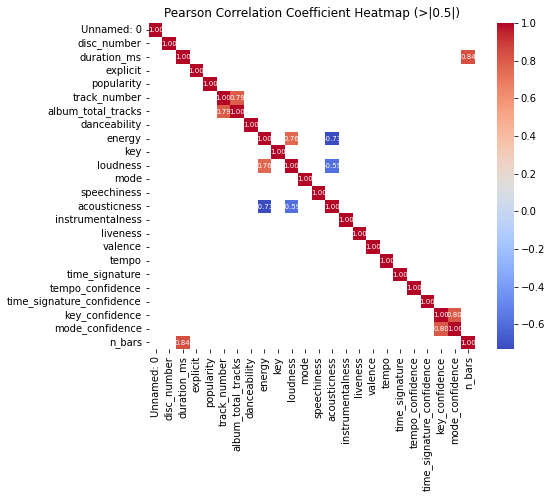

In [6]:
# Calculate the Pearson correlation coefficient matrix
corr_matrix = df.corr()

# Filter the correlation matrix to show only correlations > 0.5 or < -0.5
corr_filtered = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_filtered, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 7}, square=True)
plt.title('Pearson Correlation Coefficient Heatmap (>|0.5|)')
plt.show()


<Axes: >

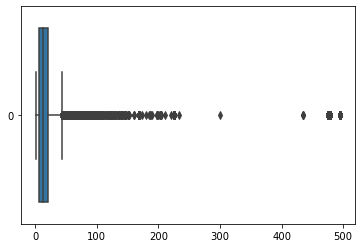

In [7]:
sns.boxplot(df["album_total_tracks"], orient="h")

<Axes: xlabel='album_total_tracks', ylabel='Count'>

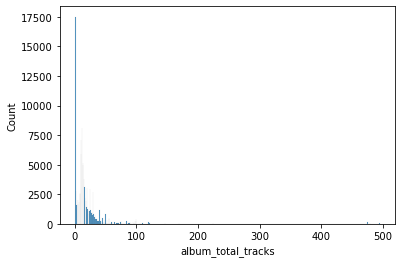

In [8]:
sns.histplot(df["album_total_tracks"])

<Axes: >

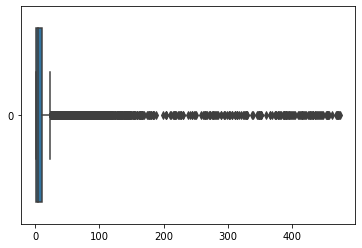

In [9]:
sns.boxplot(df["track_number"], orient="h")

<Axes: xlabel='track_number', ylabel='Count'>

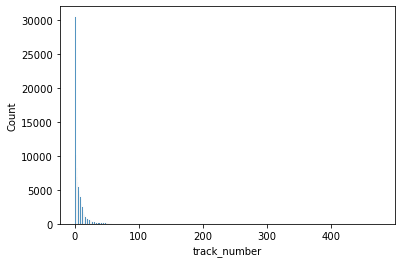

In [10]:
sns.histplot(df["track_number"])

<Axes: >

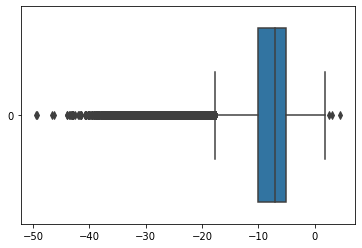

In [11]:
sns.boxplot(df["loudness"], orient="h")

<Axes: xlabel='loudness', ylabel='Count'>

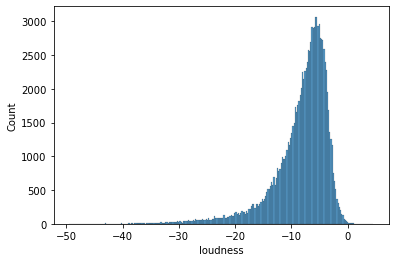

In [12]:
sns.histplot(df["loudness"])

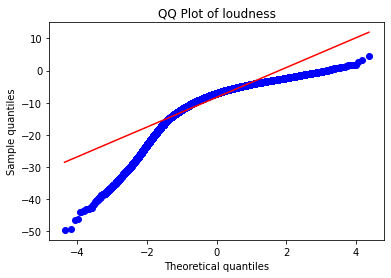

In [13]:
from scipy import stats
# Generate QQ plot
stats.probplot(df["loudness"], dist="norm", plot=plt)
plt.title('QQ Plot of loudness')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.show()

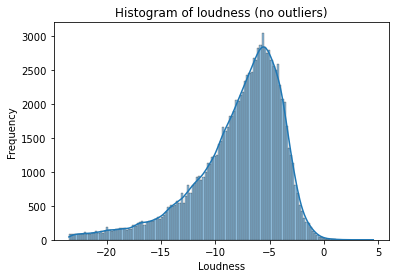

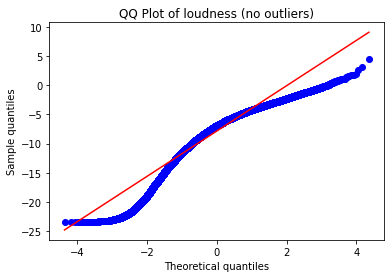

In [14]:

# Assuming you have your DataFrame stored in df

# Calculate Z-score for "loudness" column
z_scores = np.abs(stats.zscore(df["loudness"]))

# Define threshold for outliers
threshold = 3

# Find indices of outliers
outlier_indices = np.where(z_scores > threshold)[0]

# Remove outliers from DataFrame
df_no_outliers = df.drop(outlier_indices)

# Plot histogram of "loudness" with outliers removed
sns.histplot(df_no_outliers["loudness"], kde=True)
plt.title('Histogram of loudness (no outliers)')
plt.xlabel('Loudness')
plt.ylabel('Frequency')
plt.show()

# Generate QQ plot for "loudness" without outliers
stats.probplot(df_no_outliers["loudness"], dist="norm", plot=plt)
plt.title('QQ Plot of loudness (no outliers)')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.show()


<Axes: >

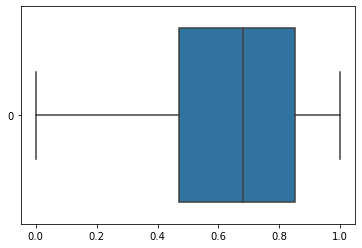

In [15]:
sns.boxplot(df["energy"], orient="h")

<Axes: xlabel='energy', ylabel='Count'>

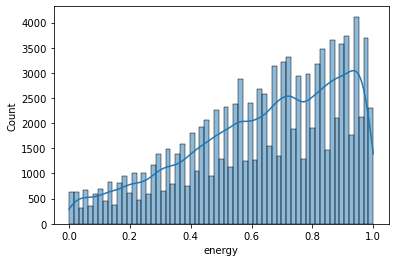

In [16]:
sns.histplot(df["energy"], kde=True)

<Axes: xlabel='valence', ylabel='Count'>

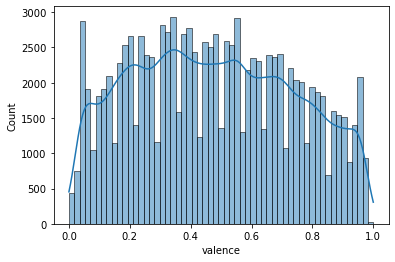

In [17]:
sns.histplot(df["valence"], kde=True)

<Axes: >

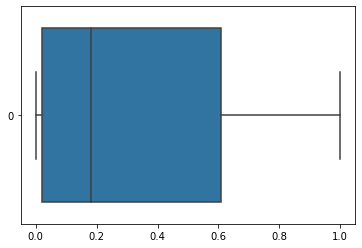

In [18]:
sns.boxplot(df["acousticness"], orient="h")

<Axes: xlabel='acousticness', ylabel='Count'>

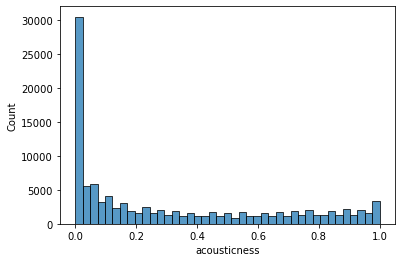

In [19]:
sns.histplot(df["acousticness"])

<Axes: xlabel='danceability', ylabel='Count'>

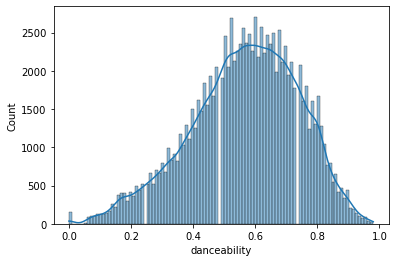

In [20]:
sns.histplot(df["danceability"], kde=True)

In [25]:
from scipy.stats import kstest

# Assuming df is your DataFrame and "column" is the column you want to test
data = df["danceability"]

# Kolmogorov-Smirnov test
stat, p_value = kstest(data, 'norm')

# Print the results
print("Kolmogorov-Smirnov Test:")
print(f"Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")


Kolmogorov-Smirnov Test:
Test Statistic: 0.5516083030319102
P-value: 0.0
Sample does not look Gaussian (reject H0)


In [27]:

# Assuming df is your DataFrame and "column" is the column you want to test
data = df["key_confidence"]

# Kolmogorov-Smirnov test
stat, p_value = kstest(data, 'norm')

# Print the results
print("Kolmogorov-Smirnov Test:")
print(f"Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")


Kolmogorov-Smirnov Test:
Test Statistic: 0.4999908382119855
P-value: 0.0
Sample does not look Gaussian (reject H0)


<Axes: xlabel='disc_number', ylabel='Count'>

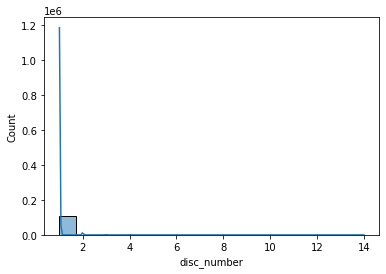

In [21]:
sns.histplot(df["disc_number"], kde=True)

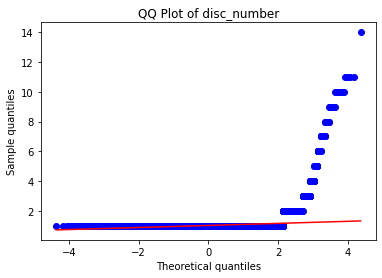

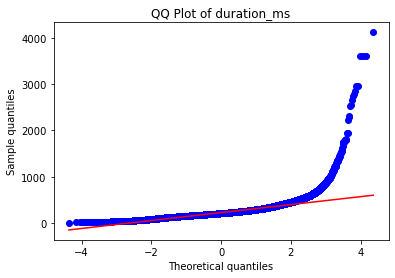

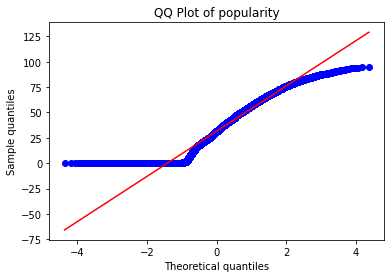

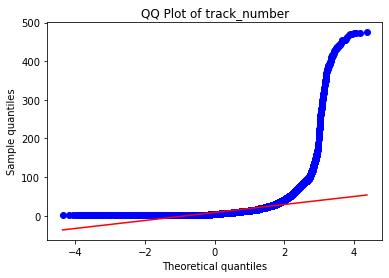

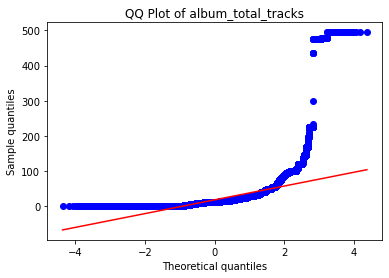

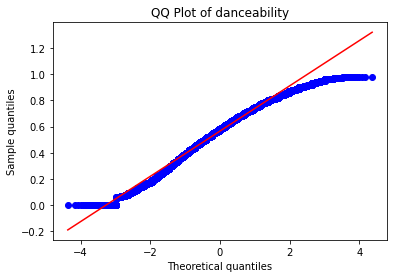

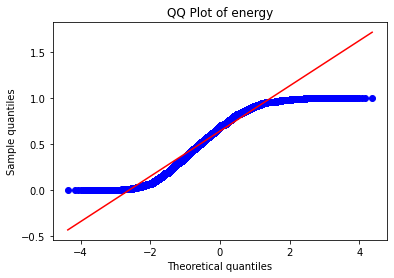

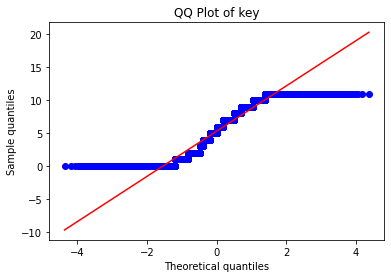

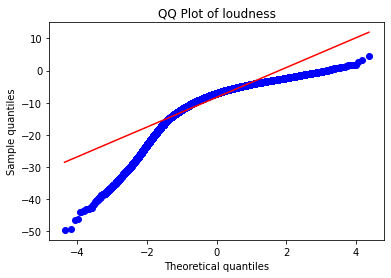

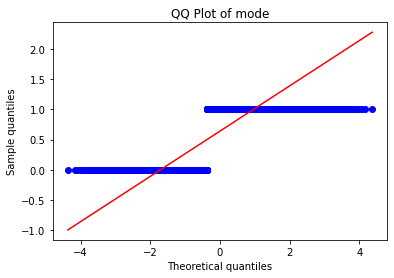

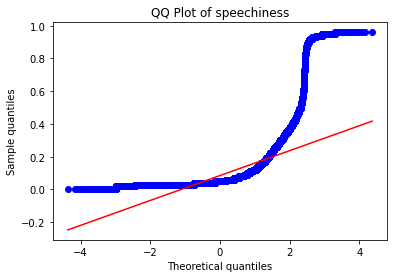

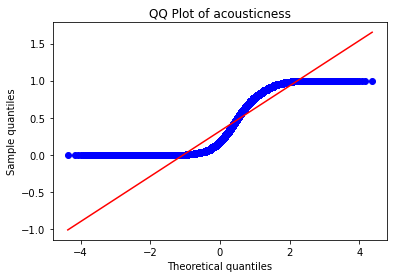

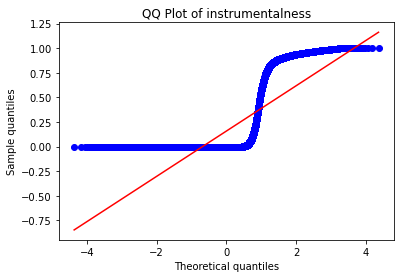

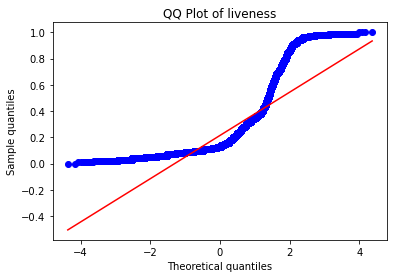

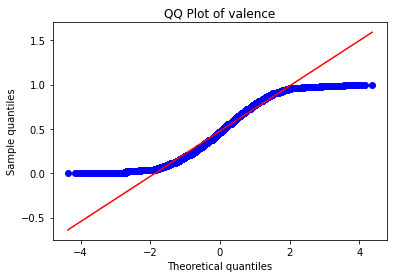

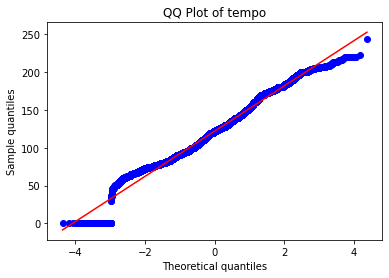

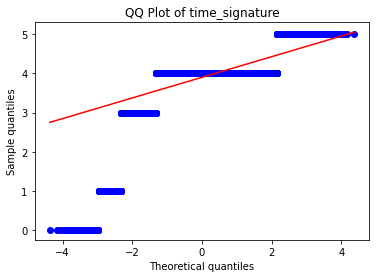

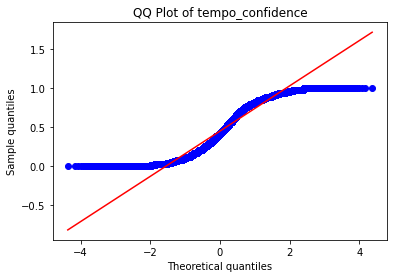

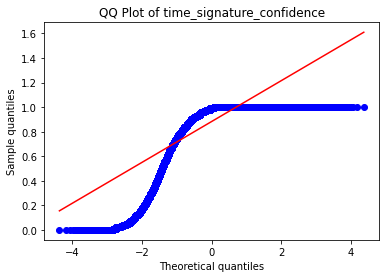

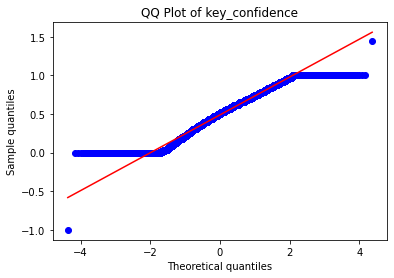

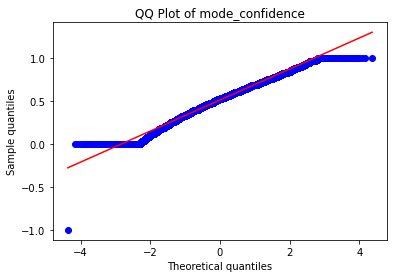

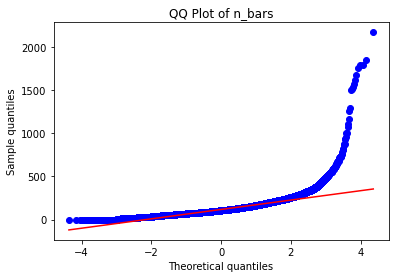

In [22]:
# Get column names
column_names = df_continui.columns

# Plot QQ plots for each column
for column in column_names:
    plt.figure()
    stats.probplot(df_continui[column], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {column}')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Sample quantiles')
    plt.show()

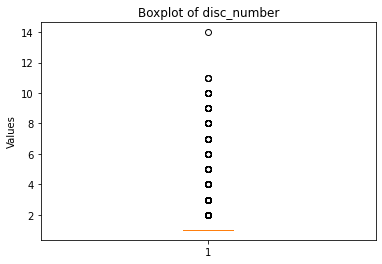

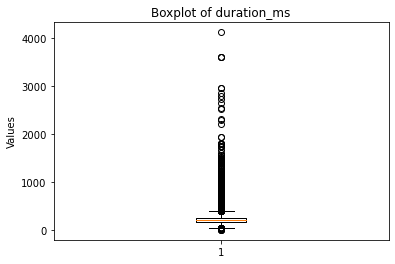

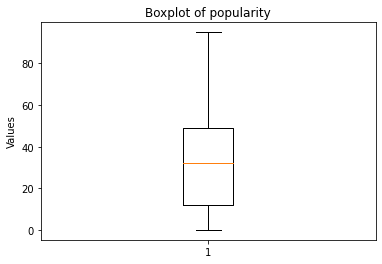

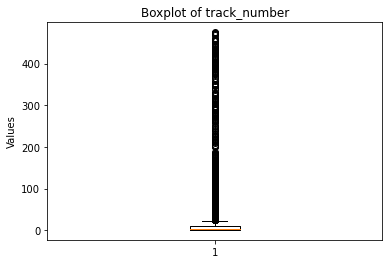

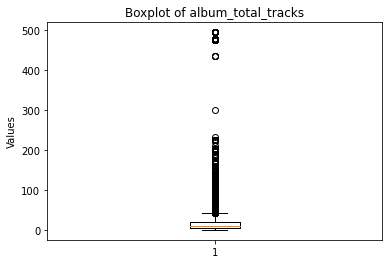

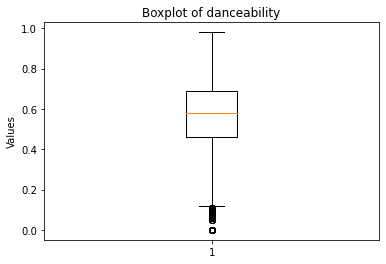

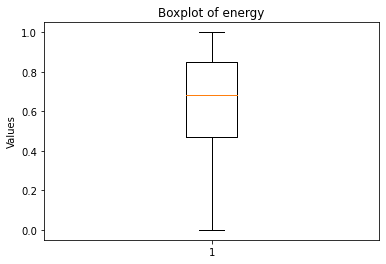

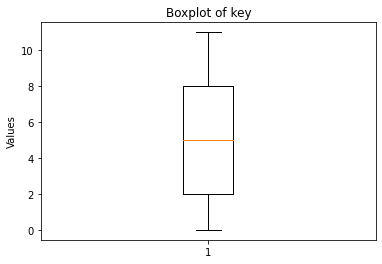

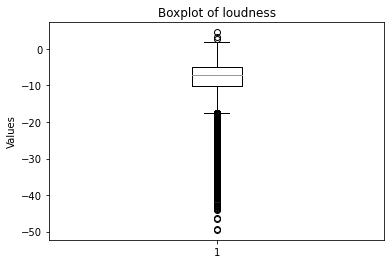

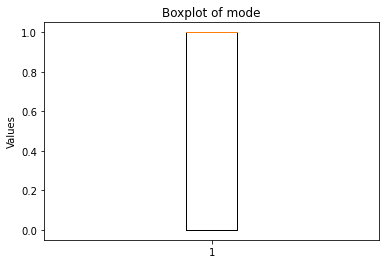

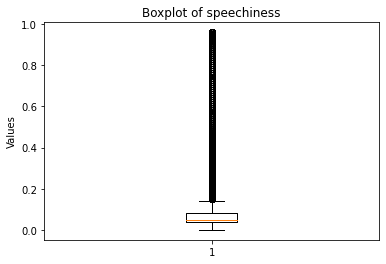

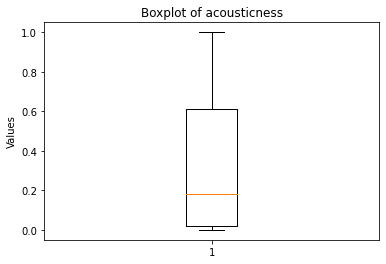

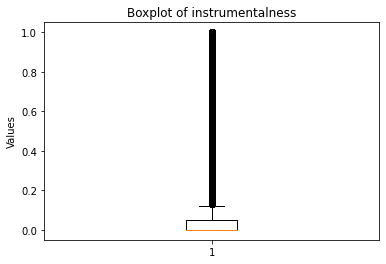

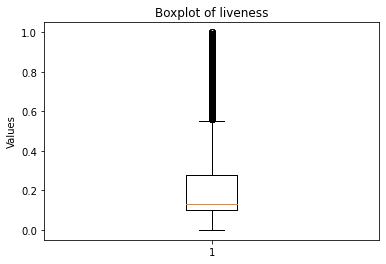

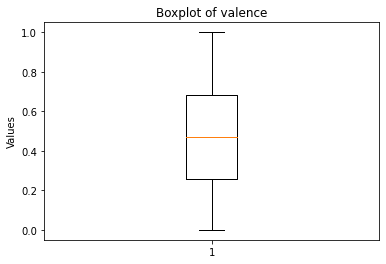

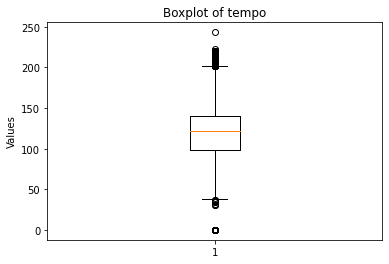

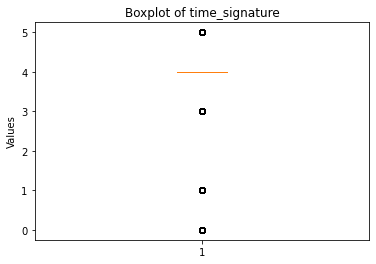

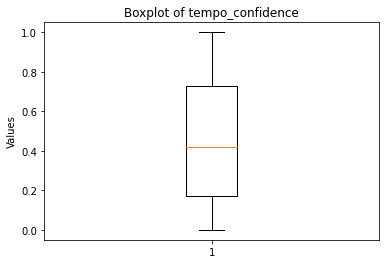

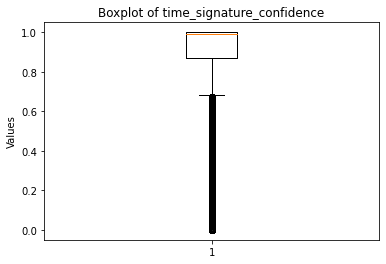

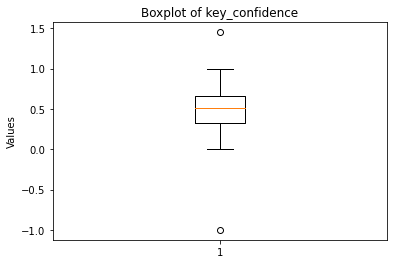

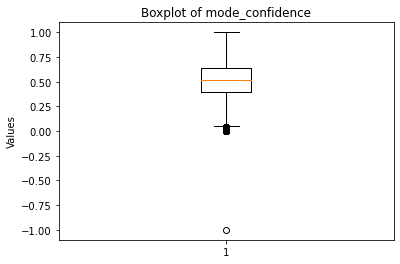

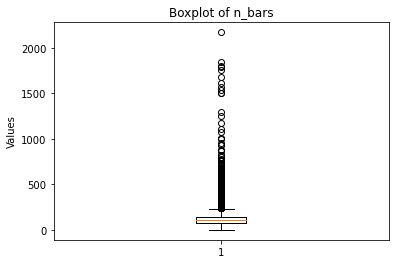

In [23]:
# Plot individual boxplots for each column
for column in df_continui.columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df_continui[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel('Values')
    plt.show()


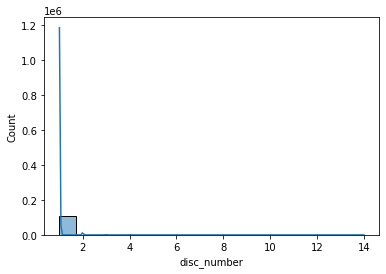

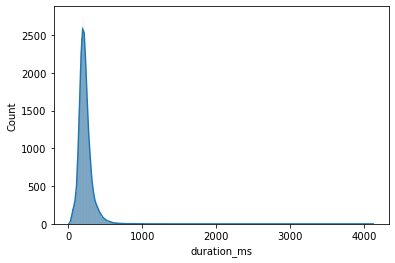

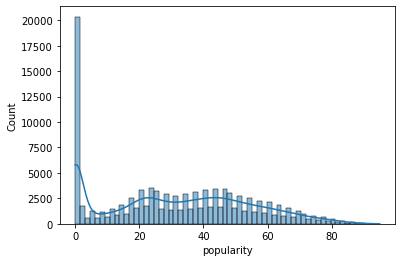

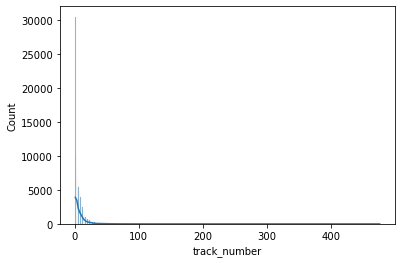

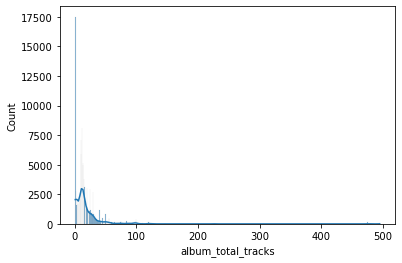

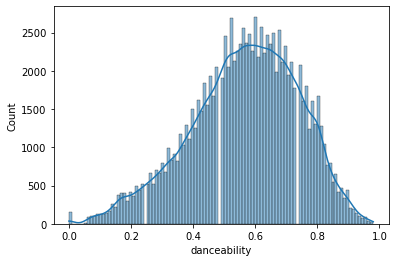

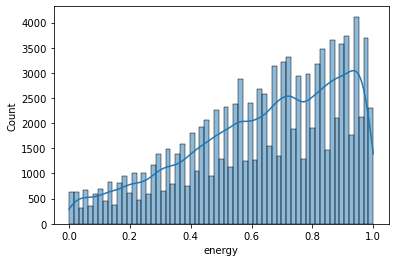

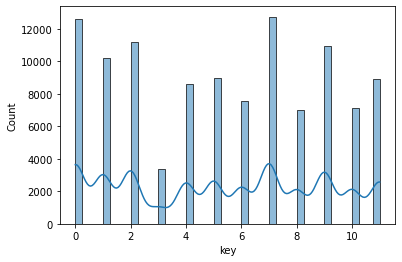

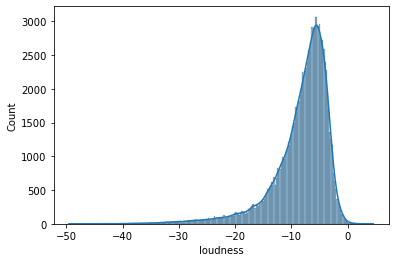

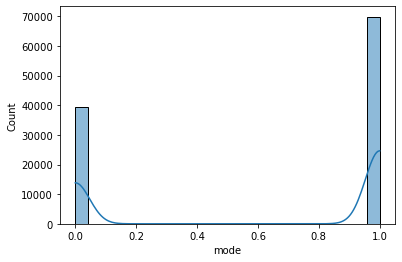

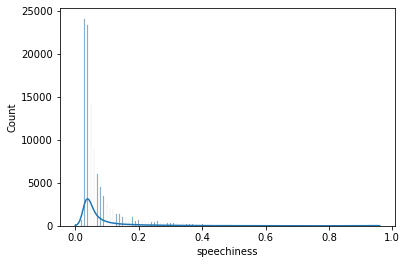

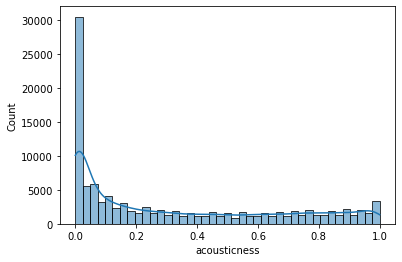

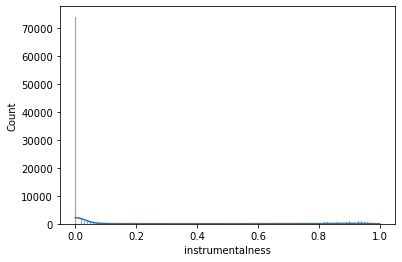

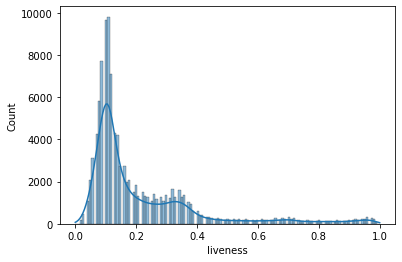

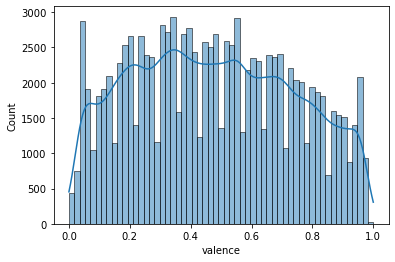

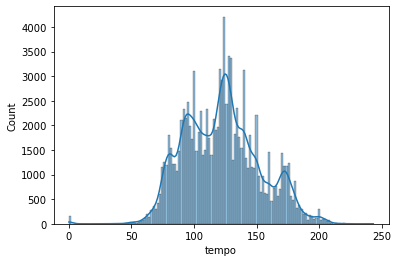

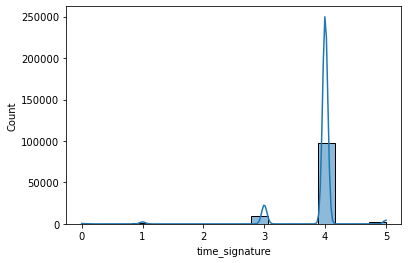

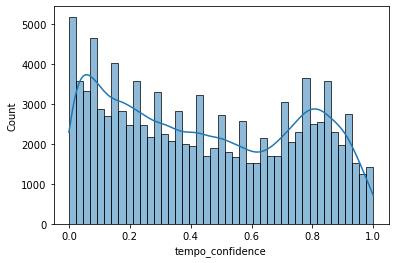

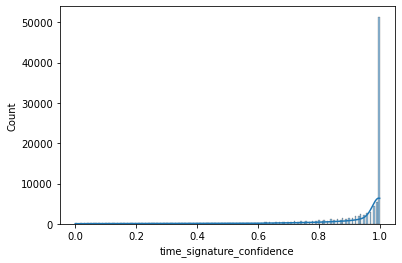

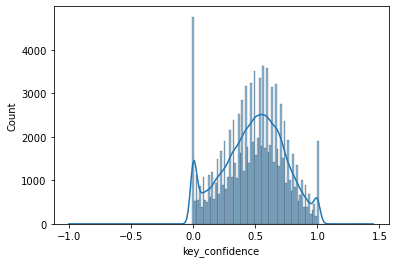

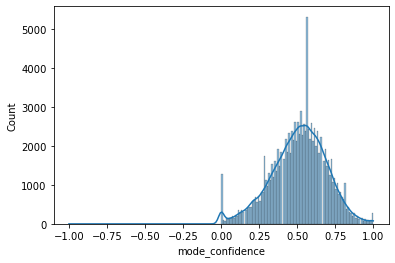

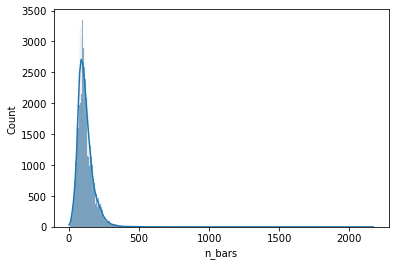

In [24]:
# Plot individual boxplots for each column
for column in df_continui.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_continui[column], kde=True)
    plt.show()
